# Accumulation/Distribution Line

https://www.investopedia.com/terms/a/accumulationdistribution.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = '^NSEBANK'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00+05:30,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600
2020-01-03 00:00:00+05:30,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600
2020-01-06 00:00:00+05:30,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200
2020-01-07 00:00:00+05:30,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400
2020-01-08 00:00:00+05:30,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500


In [3]:
def accumulation_distribution_line(df, n):
    adl = 0
    money_flow_multiplier = ((df['Adj Close'] - df['Low'].shift(n)) - (df['High'].shift(n) - df['Adj Close'])) / (df['High'].shift(n) - df['Low'].shift(n))
    money_flow_volume = money_flow_multiplier * df['Volume'].shift(n)
    adl = adl + money_flow_volume
    return adl

In [4]:
df['ADL'] = accumulation_distribution_line(df, 14)

In [5]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,ADL
Date,,,,,,,
2020-01-02 00:00:00+05:30,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600,NaN
2020-01-03 00:00:00+05:30,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600,NaN
2020-01-06 00:00:00+05:30,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200,NaN
2020-01-07 00:00:00+05:30,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400,NaN
2020-01-08 00:00:00+05:30,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500,NaN
2020-01-09 00:00:00+05:30,31748.250000,32172.699219,31667.150391,32092.400391,32092.027344,308000,NaN
2020-01-10 00:00:00+05:30,32215.699219,32347.199219,31953.400391,32097.400391,32097.027344,444700,NaN
2020-01-13 00:00:00+05:30,32139.099609,32322.650391,32074.050781,32177.650391,32177.277344,291400,NaN
2020-01-14 00:00:00+05:30,32196.449219,32196.449219,31989.199219,32071.650391,32071.277344,438900,NaN


In [6]:
df['VolumePositive'] = df['Open'] < df['Adj Close']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Date')

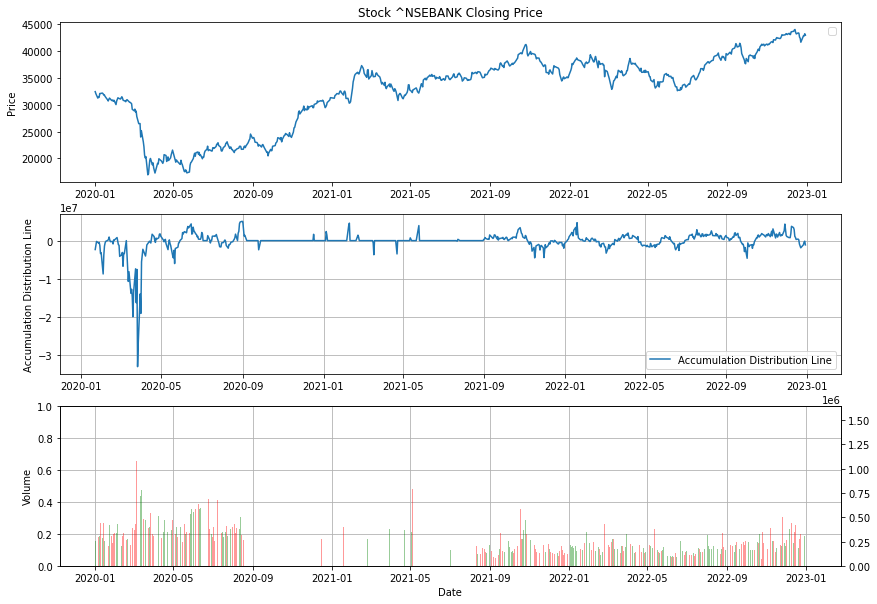

In [7]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(3, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['ADL'], label='Accumulation Distribution Line')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Accumulation Distribution Line')

ax3 = plt.subplot(3, 1, 3)
ax3v = ax3.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax3v.bar(df.index, df['Volume'], color=colors, alpha=0.4)
ax3.set_ylabel('Volume')
ax3.grid()
ax3.set_xlabel('Date')

## Candlestick with Accumulation/Distribution Line

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ADL,VolumePositive
0,18262.770833,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600,NaN,True
1,18263.770833,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600,NaN,False
2,18266.770833,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200,NaN,False
3,18267.770833,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400,NaN,False
4,18268.770833,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500,NaN,True


Text(0.5, 0, 'Date')

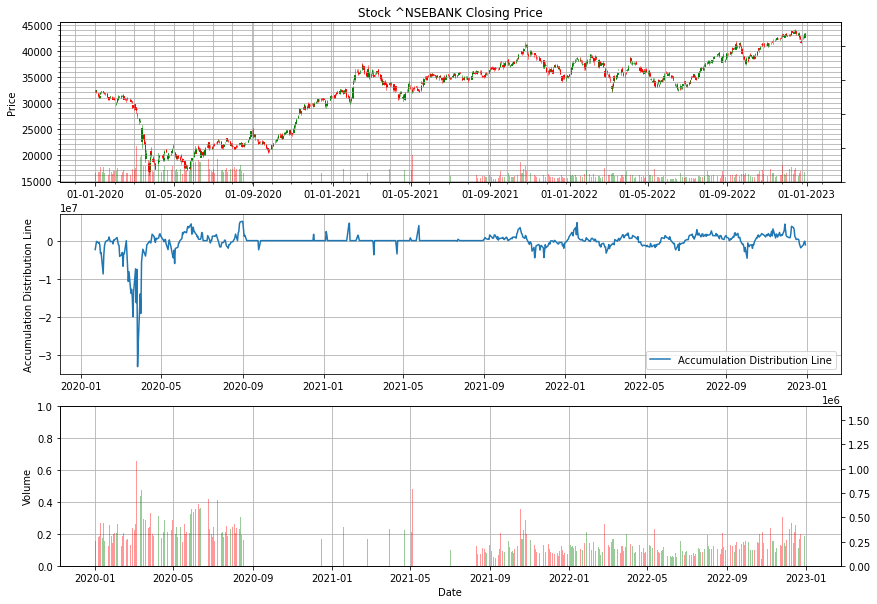

In [10]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(3, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['ADL'], label='Accumulation Distribution Line')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Accumulation Distribution Line')

ax3 = plt.subplot(3, 1, 3)
ax3v = ax3.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax3v.bar(df.index, df['Volume'], color=colors, alpha=0.4)
ax3.set_ylabel('Volume')
ax3.grid()
ax3.set_xlabel('Date')